In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench import load_results



In [15]:
results = load_results('try_DisagT_PD7_1_1.tar.gz')
experiments, outcomes = results


In [37]:
y_deaths= outcomes['Expected Number of Deaths']
y_costs =  outcomes['All Costs']

In [17]:
outcomes

{'Expected Number of Deaths': array([[0., 0., 0., 0., 0.]]),
 'A.1_Expected Annual Damage': array([[0., 0., 0., 0., 0.]]),
 'A.2_Expected Annual Damage': array([[0., 0., 0., 0., 0.]]),
 'A.3_Expected Annual Damage': array([[0., 0., 0., 0., 0.]]),
 'A.4_Expected Annual Damage': array([[0., 0., 0., 0., 0.]]),
 'A.5_Expected Annual Damage': array([[0., 0., 0., 0., 0.]]),
 'Dike Investment Costs': array([[1.97602954e+08, 1.16834522e+08, 3.49293195e+08, 2.51154306e+08,
         3.22213589e+08]]),
 'RfR Total Costs': array([[1.153e+08, 5.585e+08, 2.178e+08, 4.926e+08, 4.080e+08]]),
 'Expected Evacuation Costs': array([[0., 0., 0., 0., 0.]]),
 'Total_period_Costs': array([[3.12902954e+08, 6.75334522e+08, 5.67093195e+08, 7.43754306e+08,
         7.30213589e+08]])}

In [30]:
import statsmodels.api as sm

X = pd.DataFrame(experiments).drop(['model','policy'], inplace=False, axis=1)
X_0 = sm.add_constant(X)

est_deaths = sm.OLS(y_deaths, X_0.astype(float)).fit()
print(est_deaths.summary())
#print(est_deaths.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     15.38
Date:                Thu, 30 May 2024   Prob (F-statistic):           3.68e-61
Time:                        15:31:31   Log-Likelihood:                 2567.0
No. Observations:                1000   AIC:                            -5074.
Df Residuals:                     970   BIC:                            -4927.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [31]:
est_costs = sm.OLS(y_costs, X_0.astype(float)).fit()
print(est_costs.summary())
#print(est_deaths.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     226.7
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -20279.
No. Observations:                1000   AIC:                         4.062e+04
Df Residuals:                     970   BIC:                         4.077e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

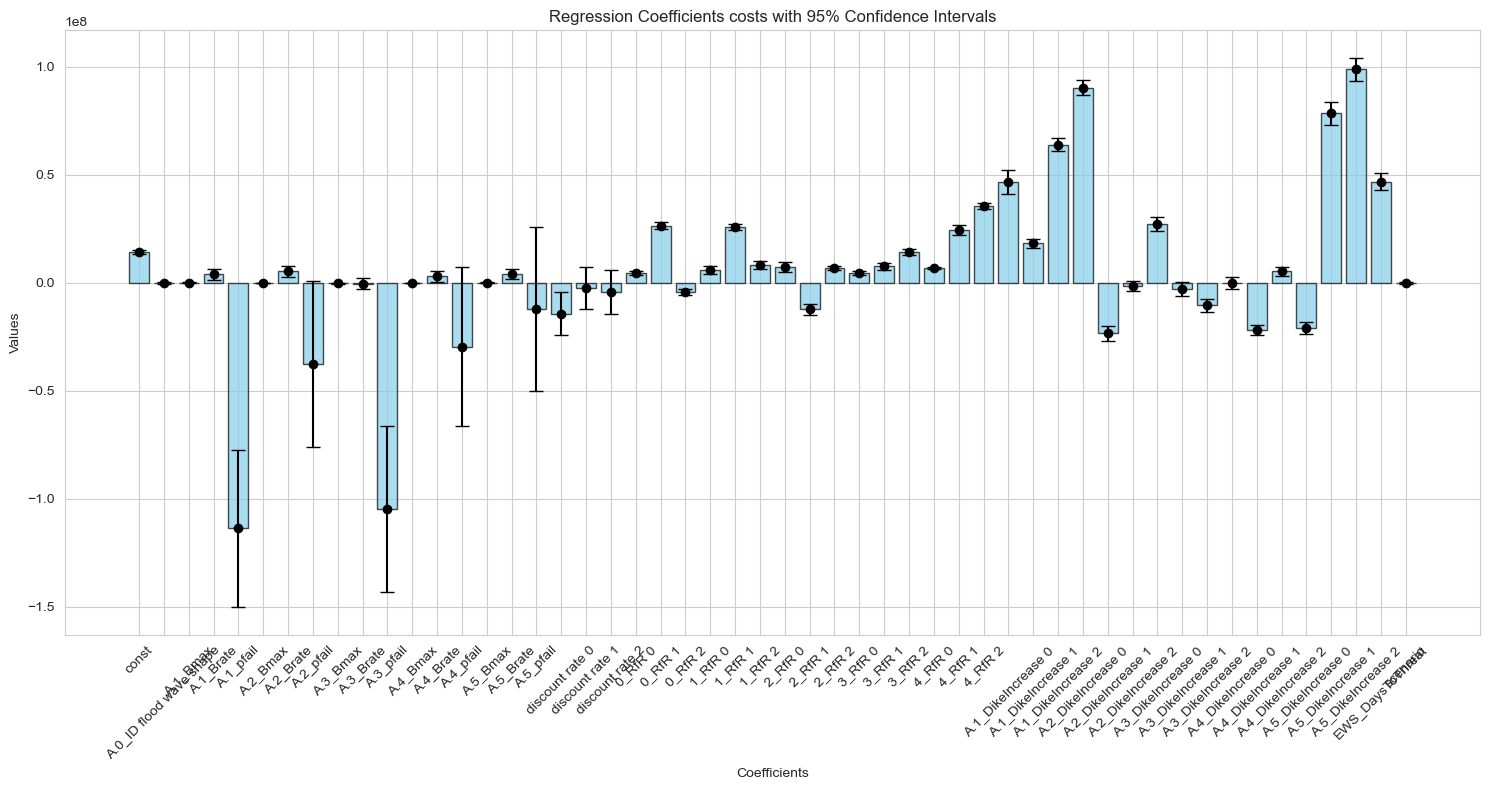

In [34]:
# Coëfficiënten en betrouwbaarheidsintervallen ophalen
coef_costs = est_costs.params
conf_int_costs = est_costs.conf_int()

# Plotten
fig, ax = plt.subplots(figsize=(15, 8))

# Histogram van coëfficiënten
ax.bar(range(len(coef_costs)), coef_costs, color='skyblue', alpha=0.7, align='center', edgecolor='black')

# Lijntjes voor betrouwbaarheidsintervallen
ax.errorbar(range(len(coef_costs)), coef_costs, 
            yerr=[coef_costs - conf_int_costs[0], conf_int_costs[1] - coef_costs], 
            fmt='o', color='black', capsize=5)

# Labels en titel
ax.set_xticks(range(len(coef_costs)))
ax.set_xticklabels(coef_costs.index, rotation=45)
ax.set_xlabel('Coefficients')
ax.set_ylabel('Values')
ax.set_title('Regression Coefficients costs with 95% Confidence Intervals')

plt.tight_layout()

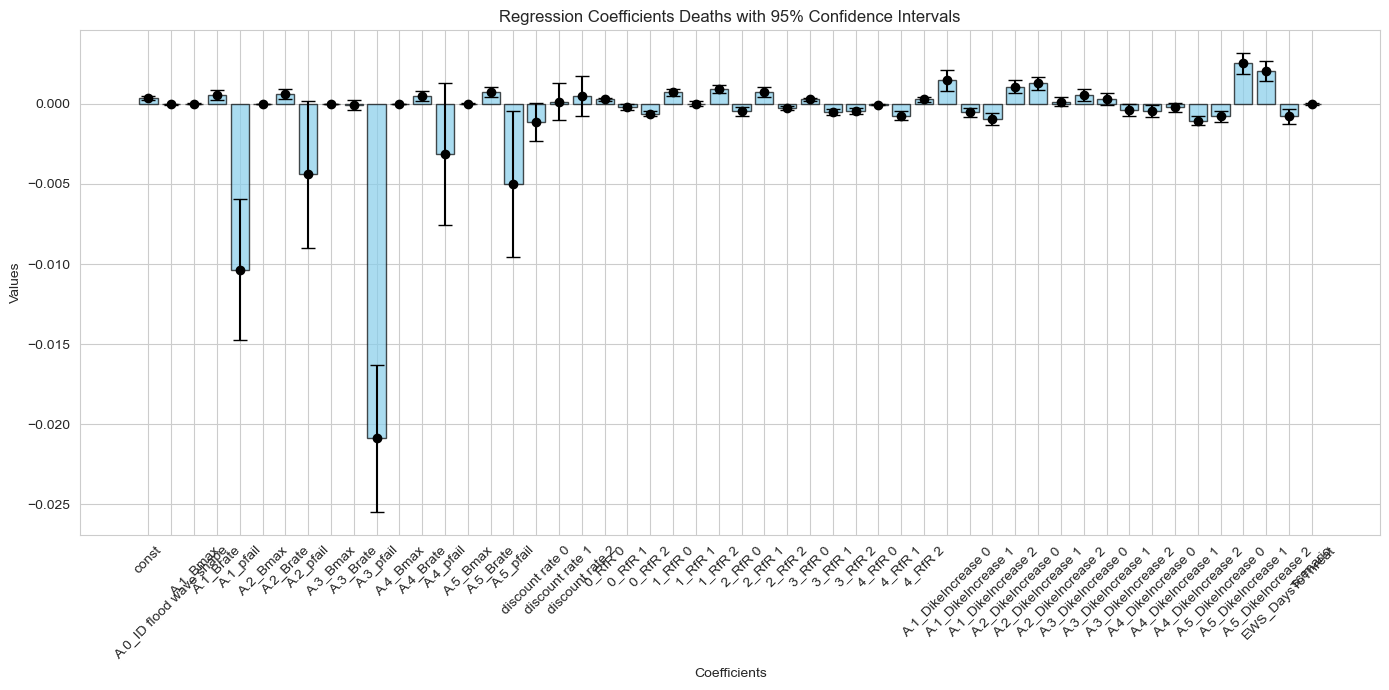

In [39]:
#Coëfficiënten en betrouwbaarheidsintervallen ophalen
coef_deaths = est_deaths.params
conf_int_deaths = est_deaths.conf_int()

# Plotten
fig, ax = plt.subplots(figsize=(14, 7))  # Verhoog de figsize voor een grotere plot

# Histogram van coëfficiënten
ax.bar(range(len(coef_deaths)), coef_deaths, color='skyblue', alpha=0.7, align='center', edgecolor='black')

# Lijntjes voor betrouwbaarheidsintervallen
ax.errorbar(range(len(coef_deaths)), coef_deaths, 
            yerr=[coef_deaths - conf_int_deaths[0], conf_int_deaths[1] - coef_deaths], 
            fmt='o', color='black', capsize=5)

# Labels en titel
ax.set_xticks(range(len(coef_deaths)))
ax.set_xticklabels(coef_deaths.index, rotation=45)
ax.set_xlabel('Coefficients')
ax.set_ylabel('Values')
ax.set_title('Regression Coefficients Deaths with 95% Confidence Intervals')

plt.tight_layout()
plt.show()